<a href="https://colab.research.google.com/github/BrandonKTC/Pytorch_Deep_learning/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch Workflow

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn

In [2]:
# Create parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [4]:
def plot_prediction(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, prediction=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot the training data
  plt.scatter(X_train, y_train, c="b")
  # Plot the Testing data
  plt.scatter(X_test, y_test, c="g")
  # Plot prediction if they exist
  if prediction != None:
    plt.scatter(X_test, prediction, c="r")

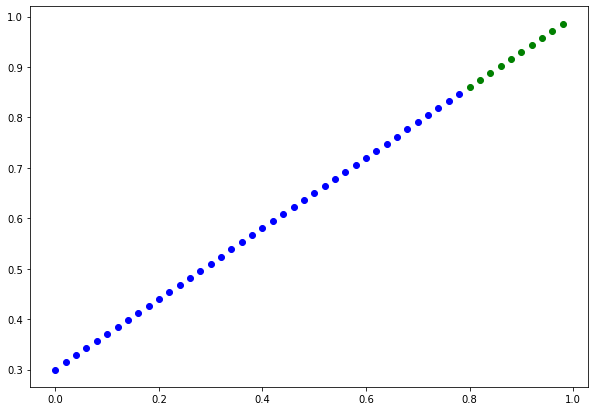

In [5]:
plot_prediction()

## 2. Build model

In [6]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                        requires_grad=True,
                                        dtype=torch.float))
    
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [7]:
# Checking the contents of our PyTorch model

torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [8]:
# Make prediction using inference_mode()
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

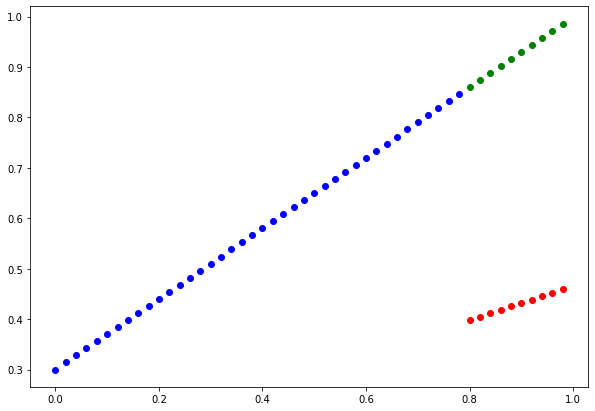

In [9]:
plot_prediction(prediction=y_preds)

In [10]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=1e-2)

## Build a training Loop

In [11]:
epochs = 100

epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
  # Set the model to training mode
  model_0.train()
  # 1. Forward pass
  y_pred = model_0(X_train)
  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)
  # 3. Optimizer zero grad
  optimizer.zero_grad()
  # 4. Perform backpropagation on the loss 
  loss.backward()
  # 5. step the optimizer(perform gradient decscent)
  optimizer.step()
  ## Testing
  model_0.eval() # turns off gradient tracking
  # 1. Forward pass
  test_pred = model_0(X_test)
  # 2. Calculate the loss
  test_loss = loss_fn(test_pred, y_test)
  # Print our what's happening
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
    # Print out model state_dict()
    print(model_0.state_dict())


Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

In [12]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [13]:
weight, bias

(0.7, 0.3)

In [14]:
with torch.inference_mode():
  y_preds = model_0(X_test)

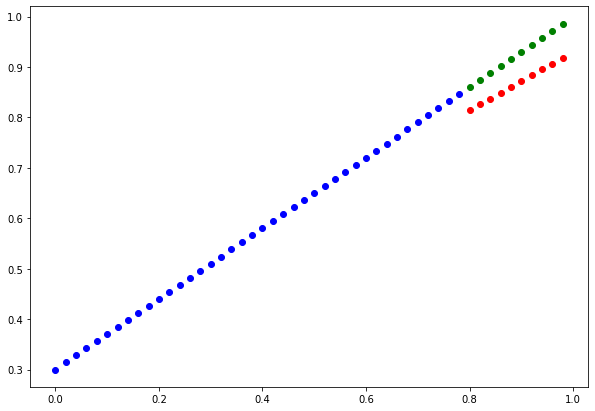

In [15]:
plot_prediction(prediction=y_preds)

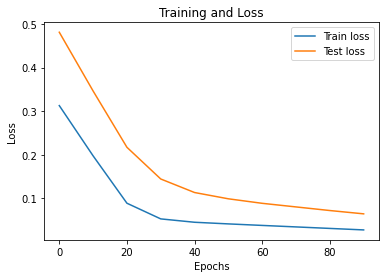

In [16]:
plt.plot(epoch_count, torch.tensor(loss_values).numpy(), label="Train loss")
plt.plot(epoch_count, torch.tensor(test_loss_values).numpy(), label="Test loss")
plt.title("Training and Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

## Save And Load

In [17]:
from pathlib import Path

# Saving the model
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create model save Path
MODEL_NAME = "01_pytorch_workflow_model_0.pkt"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

PosixPath('models/01_pytorch_workflow_model_0.pkt')

In [19]:
torch.save(model_0.state_dict(), MODEL_SAVE_PATH)

In [20]:
loaded_model = LinearRegressionModel()
loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [21]:
loaded_model.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

## Put it all together

In [22]:
X[0], X.shape, y[0], y.shape

(tensor([0.]), torch.Size([50, 1]), tensor([0.3000]), torch.Size([50, 1]))

In [31]:
device = "cuda" if torch.cuda.is_available() else 'cpu'

# Set random seed
torch.manual_seed(42)
# Split the x and y values into training and test set
split = int(0.8*len(X))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

len(X_train), len(X_test), len(y_train), len(y_test)

# Define the model
class LinearRegressoionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)
  def forward(self, x):
    return self.linear_layer

model = LinearRegressionModel()
model.to(device)
list(model.parameters())
# Define loss function and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=1e-4)

# fit the model
epochs = 20000

for epoch in range(epochs):
  ### Training phase
  model.train()
  y_pred = model(X_train.to(device))
  loss = loss_fn(y_pred, y_train.to(device))
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  ### Testing phase
  model.eval()
  test_pred = model(X_test.to(device))
  test_loss = loss_fn(test_pred, y_test.to(device))
  ### Printing the output
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | loss: {loss} | Test_loss: {test_loss}")
    print(model.state_dict())

Epoch: 0 | loss: 0.31288135051727295 | Test_loss: 0.4944014549255371
OrderedDict([('weights', tensor([0.3367], device='cuda:0')), ('bias', tensor([0.1289], device='cuda:0'))])
Epoch: 10 | loss: 0.31172919273376465 | Test_loss: 0.49305421113967896
OrderedDict([('weights', tensor([0.3371], device='cuda:0')), ('bias', tensor([0.1299], device='cuda:0'))])
Epoch: 20 | loss: 0.31057700514793396 | Test_loss: 0.49170705676078796
OrderedDict([('weights', tensor([0.3375], device='cuda:0')), ('bias', tensor([0.1309], device='cuda:0'))])
Epoch: 30 | loss: 0.30942484736442566 | Test_loss: 0.4903597831726074
OrderedDict([('weights', tensor([0.3379], device='cuda:0')), ('bias', tensor([0.1319], device='cuda:0'))])
Epoch: 40 | loss: 0.30827271938323975 | Test_loss: 0.48901256918907166
OrderedDict([('weights', tensor([0.3383], device='cuda:0')), ('bias', tensor([0.1329], device='cuda:0'))])
Epoch: 50 | loss: 0.30712056159973145 | Test_loss: 0.4876653850078583
OrderedDict([('weights', tensor([0.3387], d

In [45]:
with torch.inference_mode():
  y_preds = model(X_test.to(device))

y_preds

tensor([[0.8599],
        [0.8739],
        [0.8879],
        [0.9019],
        [0.9159],
        [0.9299],
        [0.9439],
        [0.9579],
        [0.9719],
        [0.9859]], device='cuda:0')

In [ ]:
y_preds = y_preds.cpu().numpy()

In [54]:
# plot_prediction(prediction=y_preds)
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])